In [1]:
# Importing Necessary Libraries:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

# To remove outliers
from scipy.stats import zscore

#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Importing Scrapped Dataset:
#Reading csv file 
df = pd.read_csv("Ratings.csv")
df

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Amazon looting Indians,Product is good but Amazon's hidden policy mig...,2.0 out of 5 stars
1,1,Stopped working,"Not able to switch it on, now need to contact ...",2.0 out of 5 stars
2,2,Average quality of laptop better sucks,&nbsp;Everything is good except battery life. ...,2.0 out of 5 stars
3,3,Not 1.4kg!!!!!,The product says 1.4 kg but it is much heavier...,2.0 out of 5 stars
4,4,Build quality is poor,Mouse Touch pad is very shaking and bit loose,3.0 out of 5 stars
...,...,...,...,...
94560,94560,Classy product,Exlent product,5
94561,94561,Worth the money,Product is awesome,4
94562,94562,Great product,Supperb,5
94563,94563,Worth the money,Not bad,4


I have imported the collected data which was in csv format and stored it as a dataframe. We can see the first 5 and last 5 observations of the dataset and it looks good also we have all string valued columns. In this perticular dataset we have about 94565 rows and 3 columns Unnamed: 0 is the index column of csv file so let's drop that column. Since Ratings is my target column and it is a categorical column with 5 categories so this problem is a Multi Classification Problem.

Feature Information:

Review_Title : Title of the Review.

Review_Text : Text Content of the Review.

Ratings : Ratings out of 5 stars.

## Exploratory Data Analysis [EDA]:
Since Unnamed: 0 is the index column of csv file so let's drop that column as it will not help us in our predictions.

In [3]:
# Dropping unnecessary column
df.drop(columns = 'Unnamed: 0',inplace = True)

In [4]:
df.shape

(94565, 3)

In [5]:
df.info

<bound method DataFrame.info of                                  Review_Title  \
0                      Amazon looting Indians   
1                             Stopped working   
2      Average quality of laptop better sucks   
3                              Not 1.4kg!!!!!   
4                       Build quality is poor   
...                                       ...   
94560                          Classy product   
94561                         Worth the money   
94562                           Great product   
94563                         Worth the money   
94564                               Must buy!   

                                             Review_Text             Ratings  
0      Product is good but Amazon's hidden policy mig...  2.0 out of 5 stars  
1      Not able to switch it on, now need to contact ...  2.0 out of 5 stars  
2      &nbsp;Everything is good except battery life. ...  2.0 out of 5 stars  
3      The product says 1.4 kg but it is much heavier...  2.0 o

In [6]:
# Checking for null values
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    15508
Review_Text     14021
Ratings         15504
dtype: int64


So we have a huge number of nan values in the dataset. Let's replace them using imputation methods.


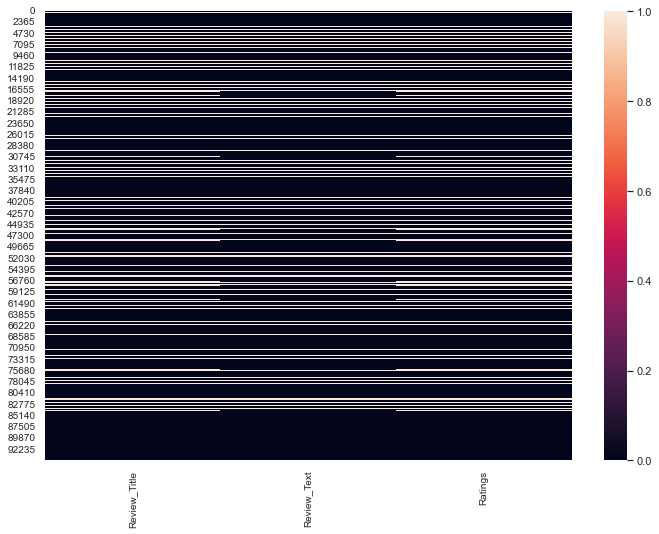

In [7]:

# Let's visualize the null values clearly in dataset using heat map
sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

Now we can clear have a look on null values by using visualization.

## Replacing nan values using imputation method:

In [8]:
#Checking the mode of Review_Title column
df["Review_Title"].mode()

0    Good
Name: Review_Title, dtype: object

#### So the highest occuring Review_Title is Good, we have to replace the nan values in Review_Title column with it's mode.

In [9]:
##Checking the mode of Review_Text column
df["Review_Text"].mode()

0    Good
Name: Review_Text, dtype: object

So the highest occuring Review_Text is Good, we have to replace the nan values in Review_Text column with it's mode.



In [10]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()


5.0 out of 5 stars    16450
4.0 out of 5 stars    14490
1.0 out of 5 stars    14396
3.0 out of 5 stars    12664
2.0 out of 5 stars    11340
5                      5906
4                      1691
1                      1225
3                       638
2                       261
Name: Ratings, dtype: int64

Since the highes count in Ratings column is for 5.0 out of 5 stars followed by 4.0 out of 5 starts.



In [11]:
#Checking the mode
df["Ratings"].mode()

0    5.0 out of 5 stars
Name: Ratings, dtype: object

In [12]:
#Replacing naa values with there mode as all the columns are categorical
df["Review_Title"] = df["Review_Title"].fillna(df["Review_Title"].mode()[0])
df["Review_Text"] = df["Review_Text"].fillna(df["Review_Text"].mode()[0])
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mode()[0])

Now successfully we have replaced all the nan values using imputation method.

## Let's have a look into target column:

In [13]:
# Checking the unique value count of target column
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '5', '4', '3', '1',
       '2'], dtype=object)

In [14]:
# Replacing the string entries in target column
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')


In [15]:
# Checking the unique value count of target column again
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

Now the target column looks good for our analysis.

## Now let's combine Review_Title and Review_Text to make a single column Review:

In [16]:
# Combining Review text and title
df['Review'] = df['Review_Title'].map(str)+' '+df['Review_Text']

In [17]:
#let's have a look into our dataset
df


,Review_Title,Review_Text,Ratings,Review
0,Amazon looting Indians,Product is good but Amazon's hidden policy mig...,2,Amazon looting Indians Product is good but Ama...
1,Stopped working,"Not able to switch it on, now need to contact ...",2,"Stopped working Not able to switch it on, now ..."
2,Average quality of laptop better sucks,&nbsp;Everything is good except battery life. ...,2,Average quality of laptop better sucks &nbsp;E...
3,Not 1.4kg!!!!!,The product says 1.4 kg but it is much heavier...,2,Not 1.4kg!!!!! The product says 1.4 kg but it ...
4,Build quality is poor,Mouse Touch pad is very shaking and bit loose,3,Build quality is poor Mouse Touch pad is very ...
...,...,...,...,...
94560,Classy product,Exlent product,5,Classy product Exlent product
94561,Worth the money,Product is awesome,4,Worth the money Product is awesome
94562,Great product,Supperb,5,Great product Supperb
94563,Worth the money,Not bad,4,Worth the money Not bad


Since we have obtained Review from Review_Title and Review_Text let's drop Review_Title and Review_Text. If not they'll create multicolinearity issue.


In [18]:

# Dropping unnecessary column
df.drop(columns = 'Review_Title',inplace = True)
df.drop(columns = 'Review_Text',inplace = True)

In [19]:
# Let's have a look into our Review column and see first 2 entries how the data looks:
# Checking data of first row in Review column
df['Review'][0]

"Amazon looting Indians Product is good but Amazon's hidden policy might force you to cry..be very careful<br>Genuine review"

In [20]:
# Checking data of second row in Review column
df['Review'][1]

'Stopped working Not able to switch it on, now need to contact service centre, hope they respond'

By observing the Reviews we can say that there are many words, numbers, as well as punctuations which are not important for our predictions. So we need to do good text processing.

### Text Processing:

In [21]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [22]:
# Changing all words to there Lowercase
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [23]:
# Let's have a look into our text again:
# Checking data of first row in Review column again
df['Review'][0]

'amazon looting indians product is good but amazon is hidden policy might force you to crybe very careful genuine review'

In [24]:
# Checking data of second row in Review column again
df['Review'][1]


'stopped working not able to switch it on now need to contact service centre hope they respond'

Now the data looks far better than previous.And we have successfully removed punctuations and unwanted text from our text and lowercased all the text data.

## Removing StopWords:

In [25]:
# Removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [26]:
# Checking the text data again
df['Review'][0]

'amazon looting indians product good amazon hidden policy might force crybe careful genuine review'

In [27]:
# Checking the text data again
df['Review'][1]

'stopped working able switch need contact service centre hope respond'

Now we have removed all stop words from the text data.

## Lemmatization:

In [28]:
#Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [29]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [30]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [31]:
df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [32]:
# Checking the text data again
df['Review'][0]

'amazon loot indian product good amazon hidden policy might force crybe careful genuine review'

So now we have removed the inflectional endings and left out with the base or dictionary form of a word.

### Text Normalization - Standardization:

In [33]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [34]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [35]:
# Checking the text data again
df['Review'][0]


'amazon loot indian product good amazon hidden policy might force crybe careful genuine review'

In [36]:
# Checking the text data again
df['Review'][1]


'stop work able switch need contact service centre hope respond'

Finally I have defined a function scrub_words for removing the noise from the text. It will remove any html markups, digits and white spaces from the text.

Now We did all the text-processing steps and got required input for our model. We will get into Visualization part now.

## Visualization:
1) Word Counts:

In [37]:
# Creating column for word counts in the text
df['Review_WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,14,amazon loot indian product good amazon hidden ...
1,10,stop work able switch need contact service cen...
2,20,average quality laptop better suck nbspeveryth...
3,11,kg product say kg much heavy wished lightweig...
4,9,build quality poor mouse touch pad shake bit l...


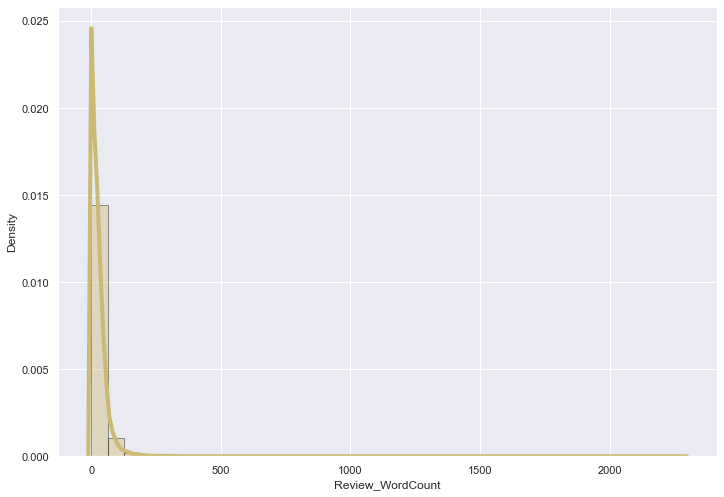

In [38]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

By observing the histogram we can clearly see that most of our text is having the number of words in the range of 0 to 200, But some of the reviews are too lengthy which may act like outliers in our data.

2) Character count:

In [39]:
# Creating column for character counts in the text
df['Review_ChaCount'] = df['Review'].str.len()
df[['Review_ChaCount','Review']].head()

,Review_ChaCount,Review
0,93,amazon loot indian product good amazon hidden ...
1,62,stop work able switch need contact service cen...
2,132,average quality laptop better suck nbspeveryth...
3,66,kg product say kg much heavy wished lightweig...
4,50,build quality poor mouse touch pad shake bit l...


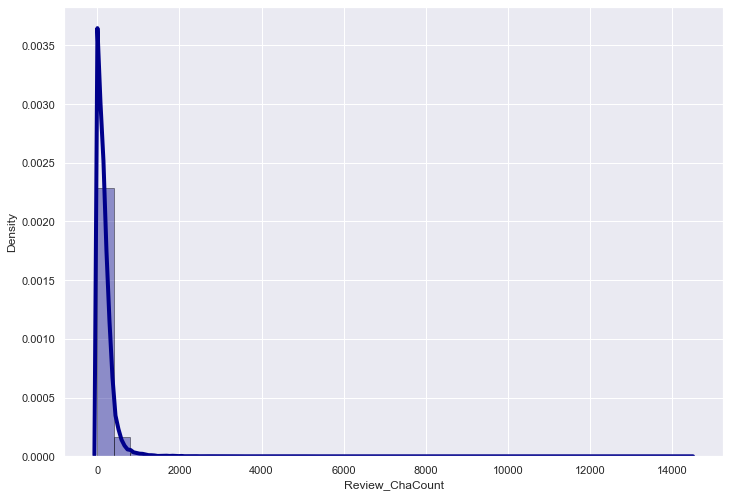

In [40]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of Review text, which is quite similar to the histogram of word count.

### Removing Outliers:
As we know that some of the review are too lengthy, so i have to treat them as outliers and remove them using z_score method.

In [41]:
#Checking the shape of the dataset
df.shape

(94565, 4)

In [42]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(93336, 4)

Great by removing the outliers we are loosing 1.3% of data which is very less and it is in acceptable range.

#### Plotting histograms for word count and character counts again after removing outliers:

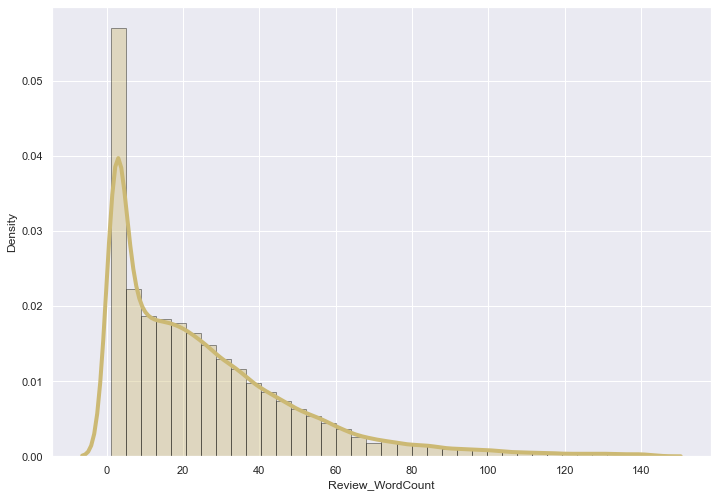

In [43]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

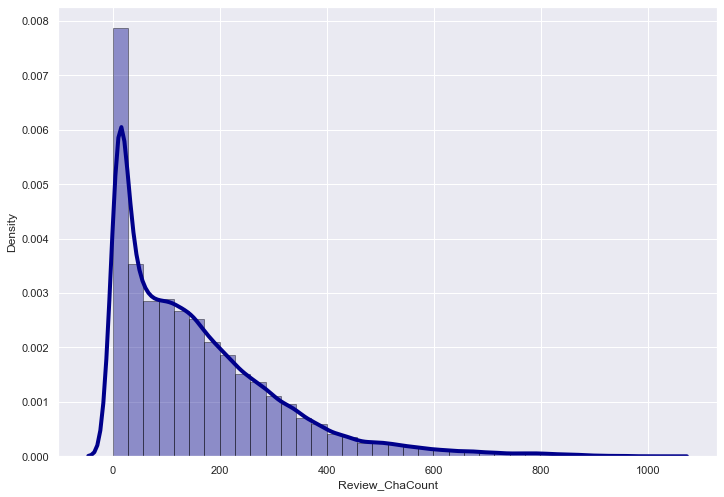

In [44]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

After plotting histograms for word counts and character counts and after removing outliers we can see we are left out with good range of number of words and characters.

3) Top 30 most frequently occuring words:

In [45]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

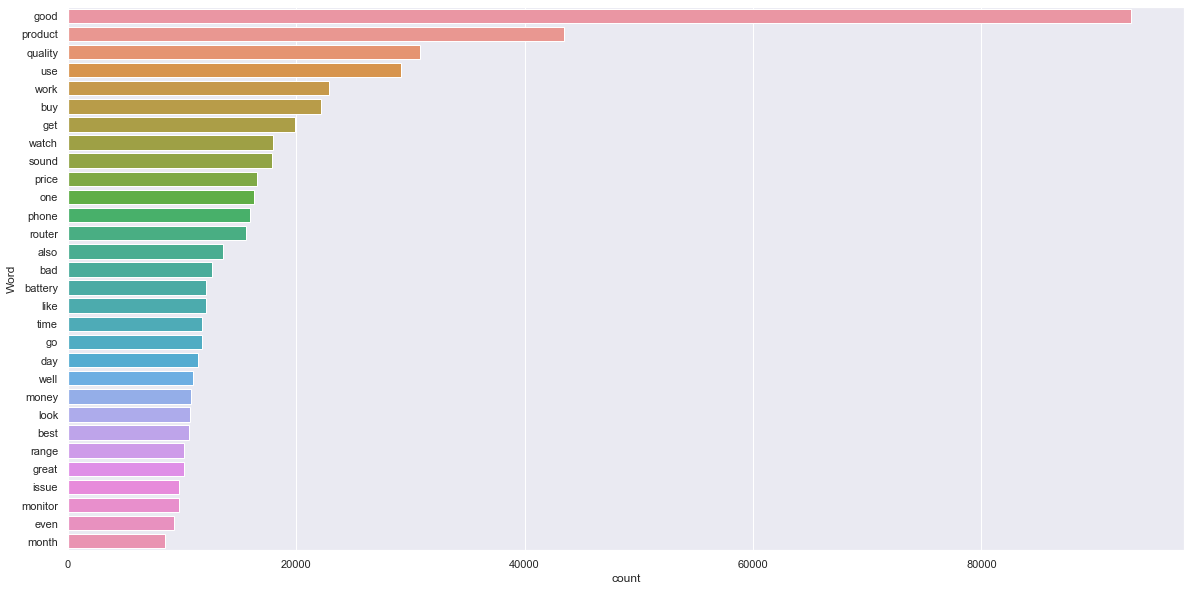

In [46]:
freq_words(df['Review'])


By seeing the above plot we can see that Good, prodout, quality......are occurring frequently.

4) Top 30 Rare words:

In [47]:
#function to plot least frequent terms
def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

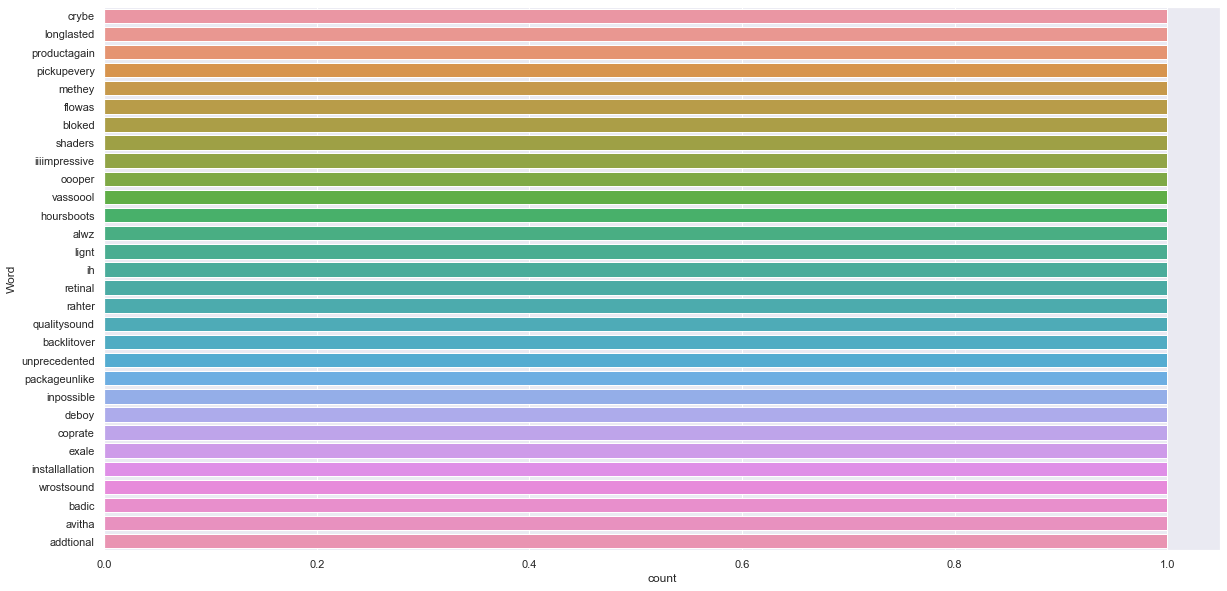

In [48]:
rare_words(df['Review'])


Above list of words are have rare occurance in Review.

5) Word cloud:

In [49]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

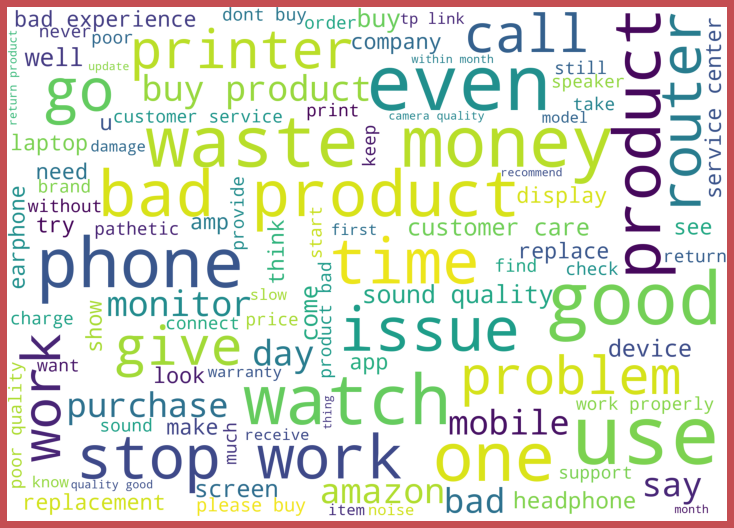

In [50]:
#Let's plot the loud words with Rating 1
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

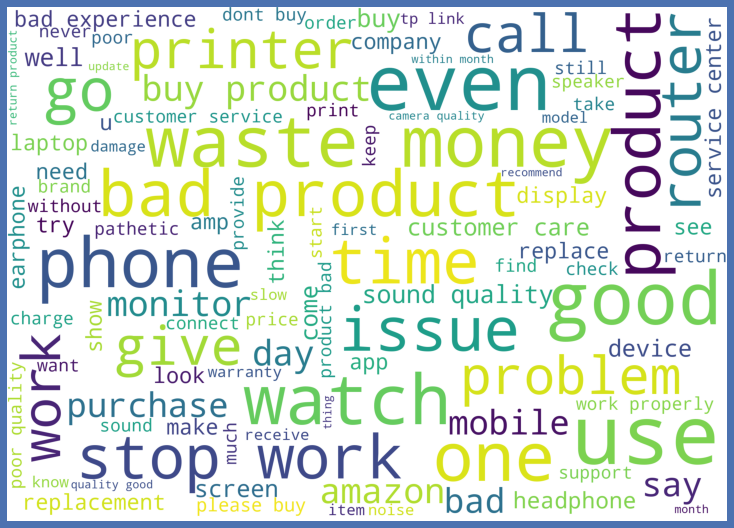

In [51]:
#Let's plot the loud words with Rating 2
from wordcloud import WordCloud

df2=df['Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

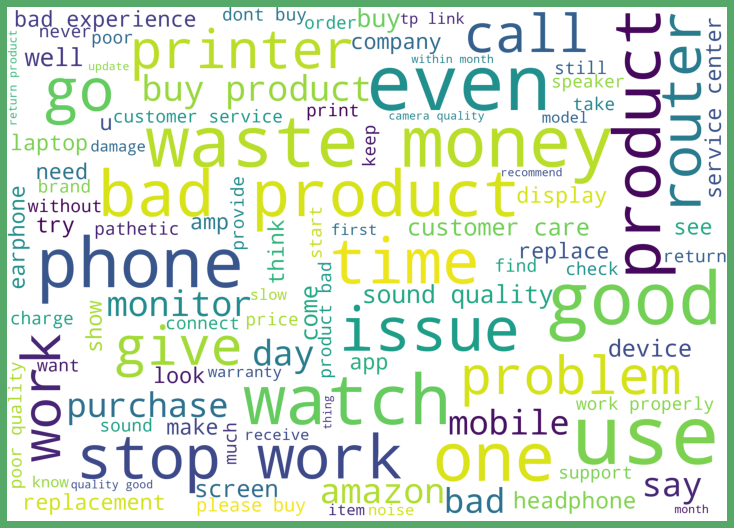

In [52]:
#Let's plot the loud words with Rating 3
from wordcloud import WordCloud

df3=df['Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

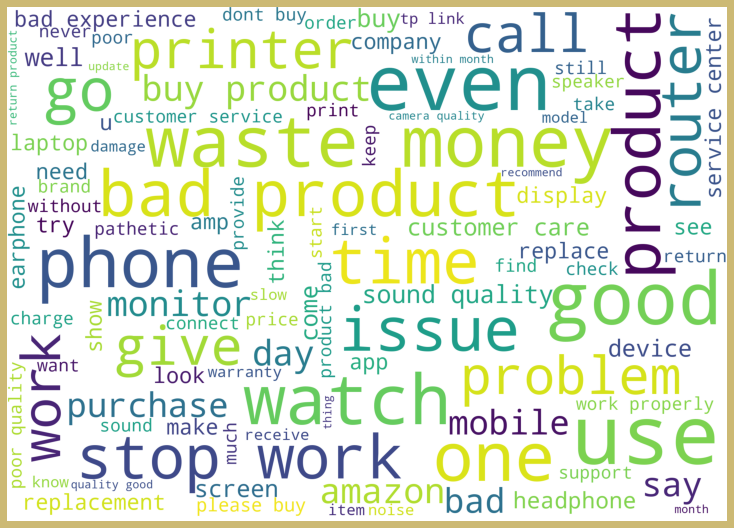

In [53]:
#Let's plot the loud words with Rating 4
from wordcloud import WordCloud

df4=df['Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

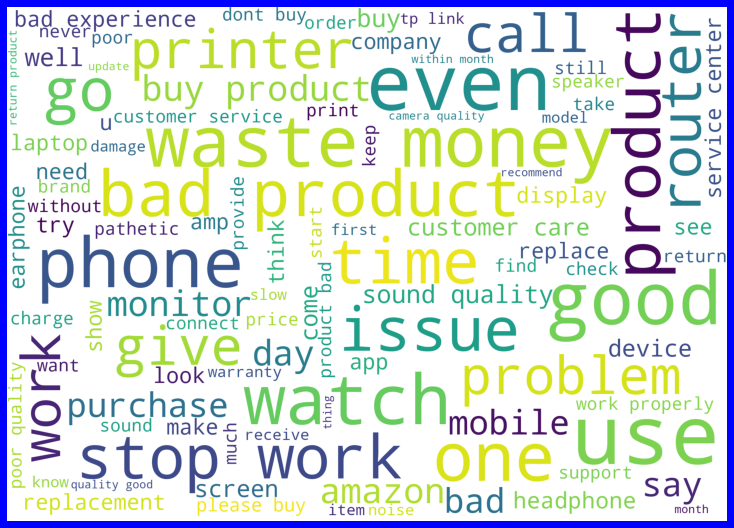

In [54]:
#Let's plot the loud words with Rating 5
from wordcloud import WordCloud

df5=df['Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

#### Observations:
From the above plots we can clearly see the words which are indication of Reviewer's opinion on products.
Here most frequent words used for each Rating is displayed in the word cloud.

In [55]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5    37258
4    15898
1    15484
3    13167
2    11529
Name: Ratings, dtype: int64

### Model Building and Evaluation:


In [56]:
# Separating feature and label
x = df['Review']
y = df['Ratings']

### Converting text data into vectors using Tfidf Vectorizer:


In [57]:
#using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [58]:
#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [59]:
#I will combine both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

### Splitting the data into train and test:


In [60]:
# Splitting train and test data
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

### Data Balancing:


In [61]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (70002, 150000)
x_test (23334, 150000)
y_train (70002,)
y_test (23334,)


Now let's do oversmapling in order to make data balanced.



In [62]:
#Checking the value counts of Ratings column
y.value_counts()

5    37258
4    15898
1    15484
3    13167
2    11529
Name: Ratings, dtype: int64

In [63]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 27938, 4: 11921, 1: 11647, 3: 9883, 2: 8613})


### So we have maximum count 27938 for 5ratings hence will over sample mannually all the ratings to the mark 27938.



In [64]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 27938, 2: 27938, 3:27938, 4: 27938, 5: 27938})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 27938, 4: 11921, 1: 11647, 3: 9883, 2: 8613})
The number of classes after fit Counter({2: 27938, 5: 27938, 1: 27938, 3: 27938, 4: 27938})


So now we have successfully balanced the data. Let's proceed with model building.



In [2]:
# Importing libraries for ML Algorithms
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV


C:\Users\hp\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [66]:
# defining the algorithms
rf = RandomForestClassifier()
DTC = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
xgb = XGBClassifier(verbosity=0)
lgb = LGBMClassifier()
sgd = SGDClassifier()


In [67]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")


In [68]:
# Running multiple algorithms
for model in [lr,svc,DTC,sgd,rf,xgb]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 71.01225679266307
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.71      0.78      0.74      3837
           2       0.55      0.49      0.52      2916
           3       0.57      0.55      0.56      3284
           4       0.57      0.64      0.60      3977
           5       0.88      0.83      0.86      9320

    accuracy                           0.71     23334
   macro avg       0.66      0.66      0.66     23334
weighted avg       0.71      0.71      0.71     23334

Confusion Matrix : 
 [[3011  475  241   71   39]
 [ 687 1423  492  226   88]
 [ 327  413 1816  553  175]
 [  99  162  426 2564  726]
 [ 131   98  238 1097 7756]]

******************************LinearSVC******************************
Accuracy Score: 75.91497385788978
---------------------------------------------------
C

### Cross validation score:

In [69]:
# Defning function cross_val to find cv score of models
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score :", scores)


In [70]:
for model in [lr,svc,DTC,sgd,rf,xgb]:
    cross_val(model)


******************************LogisticRegression******************************
Cross validation score : 59.371517956629816
******************************LinearSVC******************************
Cross validation score : 57.884417588068914
******************************DecisionTreeClassifier******************************
Cross validation score : 51.61566812376789
******************************SGDClassifier******************************
Cross validation score : 59.419730864832445
******************************RandomForestClassifier******************************
Cross validation score : 59.574012171080824
******************************XGBClassifier******************************
Cross validation score : 58.54975572126511


## Conclusion:
Key findings of the study :

In this project I have collected data of reviews and ratings for different products from amazon.in and flipkart.com.

Then I have done different text processing for reviews column and chose equal number of text from each rating class to eliminate problem of imbalance.

By doing different EDA steps I have analyzed the text. We have checked frequently occurring words in our data as well as rarely occurring words.

After all these steps I have built function to train different algorithms and using various evaluation metrics I have selected SGDClassifier for our final model.

